# Random Forest Classification with Python and Scikit-Learn


Random Forest is a supervised machine learning algorithm which is based on ensemble learning. In this project, I build two Random Forest Classifier models to predict the safety of the car, one with 10 decision-trees and another one with 100 decision-trees. The expected accuracy increases with number of decision-trees in the model. I have demonstrated the **feature selection process** using the Random Forest model to find only the important features, rebuild the model using these features and see its effect on accuracy. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.


## Table of Contents


1.	Introduction to Random Forest algorithm
2.	Random Forest algorithm intuition
3.	Advantages and disadvantages of Random Forest algorithm
4.	Feature selection with Random Forests
5.	The problem statement
6.	Dataset description
7.	Import libraries
8.	Import dataset
9.	Exploratory data analysis
10.	Declare feature vector and target variable
11.	Split data into separate training and test set
12.	Feature engineering
13.	Random Forest Classifier model with default parameters
14.	Random Forest Classifier model with parameter n_estimators=100
15.	Find important features with Random Forest model
16.	Visualize the feature scores of the features
17.	Build the Random Forest model on selected features
18.	Confusion matrix
19.	Classification report
20.	Results and conclusion



## 1. Introduction to Random Forest algorithm



Random forest is a supervised learning algorithm. It has two variations – one is used for classification problems and other is used for regression problems. It is one of the most flexible and easy to use algorithm. It creates decision trees on the given data samples, gets prediction from each tree and selects the best solution by means of voting. It is also a pretty good indicator of feature importance.


Random forest algorithm combines multiple decision-trees, resulting in a forest of trees, hence the name `Random Forest`. In the random forest classifier, the higher the number of trees in the forest results in higher accuracy.



## 2. Random Forest algorithm intuition


Random forest algorithm intuition can be divided into two stages. 


In the first stage, we randomly select “k” features out of total `m` features and build the random forest. In the first stage, we proceed as follows:-

1.	Randomly select `k` features from a total of `m` features where `k < m`.
2.	Among the `k` features, calculate the node `d` using the best split point.
3.	Split the node into daughter nodes using the best split.
4.	Repeat 1 to 3 steps until `l` number of nodes has been reached.
5.	Build forest by repeating steps 1 to 4 for `n` number of times to create `n` number of trees.


In the second stage, we make predictions using the trained random forest algorithm. 

1.	We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome.
2.	Then, we calculate the votes for each predicted target.
3.	Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm.


## 3. Advantages and disadvantages of Random Forest algorithm


The advantages of Random forest algorithm are as follows:-


1.	Random forest algorithm can be used to solve both classification and regression problems.
2.	It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3.	Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem. 
4.	Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5.	Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.


The disadvantages of Random Forest algorithm are listed below:-


1.	The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision-trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.
2.	The model is difficult to interpret as compared to a decision-tree, where we can easily make a prediction as compared to a decision-tree.


## 4. Feature selection with Random Forests



Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem. 


We measure the variable importance in a dataset by fitting the random forest algorithm to the data. During the fitting process, the out-of-bag error for each data point is recorded and averaged over the forest. 


The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.


Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building. 


## 5. The problem statement


The problem is to predict the safety of the car. In this project, I build a Decision Tree Classifier to predict the safety of the car. I implement Decision Tree Classification with Python and Scikit-Learn. I have used the **Car Evaluation Data Set** for this project, downloaded from the UCI Machine Learning Repository website.


## 6. Dataset description


I have used the **Car Evaluation Data Set** downloaded from the Kaggle website. I have downloaded this data set from the Kaggle website. The data set can be found at the following url:-


http://archive.ics.uci.edu/ml/datasets/Car+Evaluation


Car Evaluation Database was derived from a simple hierarchical decision model originally developed for expert system for decision making. The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety. 

It was donated by Marko Bohanec.

## 7. Import libraries

In [28]:
!pip install seaborn
!pip install category_encoders

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 2.0 MB/s eta 0:00:05
   --- ------------------------------------ 0.8/9.8 MB 1.7 MB/s eta 0:00:06
   ----- ---------------------------------- 1.3/9.8 MB 2.0 MB/s eta 0:00:05
   ------ --------------------------------- 1.6/9.8 MB 2.0 MB/s eta 0:00:05
   -------- ------------------------------- 2.1/9.8 MB 2.0 MB/s eta 0:00:04
   ----------- ---------------------------- 2.9/9.8 MB 2.2 MB/s eta 0:00:04
   -------------- ------------------------- 3.7/9.8 MB 2.4 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.8 MB 2.7 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.8 MB 2.8 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 2.9 MB/s eta 0:00:02
   --------------------------- ------------ 6.8/9.8 MB 3.0 MB/s eta 0:00:02
   --------------------------------- ------ 8.1/9.8 MB 3.2 MB/s eta 0:00:01
   ----------------

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
import warnings

warnings.filterwarnings('ignore')

## 8. Import dataset

In [12]:
data = 'new.csv'

df = pd.read_csv(data, header=None)

## 9. Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [13]:
# view dimensions of dataset

df.shape

(303, 7)

We can see that there are 303 instances and 7 variables in the data set.

### View top 5 rows of dataset

In [14]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6
0,63,3,150,2.3,0,1,1
1,37,2,187,3.5,0,2,1
2,41,1,172,1.4,0,2,1
3,56,1,178,0.8,0,2,1
4,57,0,163,0.6,0,2,1


### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [15]:
col_names = ['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal', 'target']


df.columns = col_names

col_names

['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal', 'target']

In [16]:
# let's again preview the dataset

df.head()

,age,cp,thalach,oldpeak,ca,thal,target
0,63,3,150,2.3,0,1,1
1,37,2,187,3.5,0,2,1
2,41,1,172,1.4,0,2,1
3,56,1,178,0.8,0,2,1
4,57,0,163,0.6,0,2,1


We can see that the column names are renamed. Now, the columns have meaningful names.

### View summary of dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   cp       303 non-null    int64  
 2   thalach  303 non-null    int64  
 3   oldpeak  303 non-null    float64
 4   ca       303 non-null    int64  
 5   thal     303 non-null    int64  
 6   target   303 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 16.7 KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [18]:
col_names = ['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal', 'target']


for col in col_names:
    
    print(df[col].value_counts())   


age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
56    11
60    11
64    10
41    10
63     9
67     9
65     8
53     8
61     8
45     8
43     8
42     8
55     8
66     7
48     7
50     7
46     7
49     5
47     5
68     4
39     4
35     4
70     4
40     3
69     3
38     3
71     3
37     2
34     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64
cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64
thalach
162    11
163     9
160     9
173     8
152     8
       ..
117     1
71      1
118     1
134     1
90      1
Name: count, Length: 91, dtype: int64
oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
2.0     9
0.4     9
0.1     7
2.8     6
2.6     6
1.9     5
1.5     5
3.0     5
0.5     5
2.2     4
3.6     4
0.9     3
3.4     3
4.0     3
2.4     3
0.3     3
3.2     2
2.3     2
1.1     2
4.2     2
2.5     2
1.3     1
3.5     1
0.7     1
3.1     1
6.2     1
5.6     1
2.9     1
2.

We can see that the `cp`,`ca` and `thal` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `age`, `cp`, `thalach`, `oldpeak`, `ca`, `thal` and `target`.


- `target` is the target variable.

### Explore `class` variable

In [19]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

The `target` target variable is binary in nature.

### Missing values in variables

In [20]:
# check missing values in variables

df.isnull().sum()

age        0
cp         0
thalach    0
oldpeak    0
ca         0
thal       0
target     0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

## 10. Declare feature vector and target variable

In [21]:
X = df.drop(['target'], axis=1)

y = df['target']

## 11. Split data into separate training and test set

In [22]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [23]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((203, 6), (100, 6))

## 12. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will check the data types of variables again.

In [24]:
# check data types in X_train

X_train.dtypes

age          int64
cp           int64
thalach      int64
oldpeak    float64
ca           int64
thal         int64
dtype: object

### Encode categorical variables


Now, I will encode the categorical variables.

In [25]:
X_train.head()

,age,cp,thalach,oldpeak,ca,thal
37,54,2,165,1.6,0,3
16,58,2,172,0.0,0,2
126,47,0,143,0.1,0,2
291,58,0,140,4.4,3,1
273,58,0,156,0.1,1,3


We can see that all  the variables are ordinal categorical data type.

In [29]:
# import category encoders

import category_encoders as ce

In [30]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [31]:
X_train.head()

,age,cp,thalach,oldpeak,ca,thal
37,1,1,1,1,1,1
16,2,1,2,2,1,2
126,3,2,3,3,1,2
291,2,2,4,4,2,3
273,2,2,5,3,3,1


In [32]:
X_test.head()

,age,cp,thalach,oldpeak,ca,thal
179,16.0,2,60.0,5.0,3.0,3
228,15.0,4,-1.0,20.0,1.0,1
111,16.0,1,26.0,20.0,3.0,1
246,17.0,2,23.0,23.0,4.0,1
60,37.0,1,18.0,2.0,3.0,2


We now have training and test set ready for model building. 

## 13. Random Forest Classifier model with default parameters

In [33]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier



# instantiate the classifier 

rfc = RandomForestClassifier(random_state=0)



# fit the model

rfc.fit(X_train, y_train)



# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.7900


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

Here, I have build the Random Forest Classifier model with default parameter of `n_estimators = 10`. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy.

## 14. Random Forest Classifier model with parameter n_estimators=100

In [34]:
# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7900


The model accuracy score with 10 decision-trees is 0.7900 but the accuracy is same with 100 decision-trees. So, accuracy didn't increases with number of decision-trees in the model.

## 15. Find important features with Random Forest model


Until now, I have used all the features given in the model. Now, I will select only the important features, build the model using these features and see its effect on accuracy. 


First, I will create the Random Forest model as follows:-

In [35]:
# create the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=100, random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

Now, I will use the feature importance variable to see feature importance scores.

In [36]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ca         0.218600
thal       0.178793
age        0.160310
thalach    0.153132
cp         0.145605
oldpeak    0.143558
dtype: float64

We can see that the most important feature is `ca` and least important feature is `oldpeak`.

## 16. Visualize the feature scores of the features


Now, I will visualize the feature scores with matplotlib and seaborn.

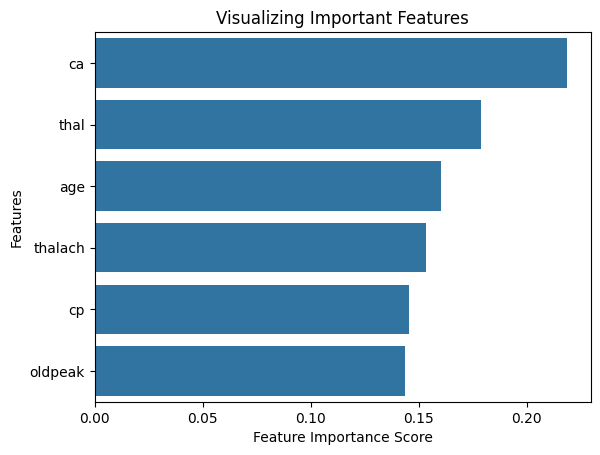

In [37]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

## 17. Build the Random Forest model on selected features


Now, I will drop the least important feature `oldpeak` from the model, rebuild the model and check its effect on accuracy.

In [39]:
# declare feature vector and target variable

X = df.drop(['target', 'oldpeak'], axis=1)

y = df['target']

In [40]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


Now, I will build the random forest model and check accuracy.

In [42]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['age', 'cp', 'thalach', 'ca', 'thal'])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [43]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=0)



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with oldpeak variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.7900


I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.

Furthermore, the second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 18. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [44]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[34  8]
 [13 45]]


## 19. Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        42
           1       0.85      0.78      0.81        58

    accuracy                           0.79       100
   macro avg       0.79      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



## 20. Results and conclusion


1.	In this project, I build a Random Forest Classifier to predict the safety of the car. I build two models, one with 10 decision-trees and another one with 100 decision-trees. 
2.	The model accuracy score with 10 decision-trees is 0.9247 but the same with 100 decision-trees is 0.9457. So, as expected accuracy increases with number of decision-trees in the model.
3.	I have used the Random Forest model to find only the important features, build the model using these features and see its effect on accuracy. The most important feature is `safety` and least important feature is `doors`.
4.	I have removed the `doors` variable from the model, rebuild it and checked its accuracy. The accuracy of the model with `doors` variable removed is 0.9264. The accuracy of the model with all the variables taken into account is 0.9247. So, we can see that the model accuracy has been improved with `doors` variable removed from the model.
5.	The second least important model is `lug_boot`. If I remove it from the model and rebuild the model, then the accuracy was found to be 0.8546. It is a significant drop in the accuracy. So, I will not drop it from the model.
6.	Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.

